In [1]:
import numpy as np
import pandas as pd

import scipy

import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()

<div class="alert alert-info">

<b>Программа семинара: </b>
    
Типы данных, меры и типы переменных. Выборка, ошибки выборки, объем выборки. Пропуски и выбросы. Преобразование Бокса - Кокса. Масштабирование и категориальные переменные

# Типы данных и типы переменных

В самом общем виде данные можно разделить на 2 типа: количественные и качественные.

# Количественные переменные

Отображают количество чего-то. Здесь цифры имеют математическое значение, они оценивают количество какой-то характеристики, например, сумма дохода — `15 000` рублей.

**Количественные данные**, в свою очередь, можно поделить на **дискретные** и **непрерывные**.

Данные дискретного типа не могут иметь дробной части, они принимают какие-то отдельные целые значения (их конечное число). Например, число детей в семье — их может быть 1, 2, 3 или 5, но не может быть два с половиной. Примеры **дискретных данных:**
* Число посетителей сайта за день / неделю / месяц;
* Число больных, поступающих в больницы города ежедневно;
* Численность учащихся каждого класса школы на начало учебного года;
* Количество страховых компаний, получивших лицензию.

**Непрерывные данные** — это та шкала, которая занимает все пространство, может принимать любые значения, от `−∞` до `+∞` и может быть, конечно, дробной. Например, время можно измерять в днях, в часах, в секундах, в миллисекундах (т.е ограничения только на требуемую точность измерений), и это будут **непрерывные данные**, определенные на всем протяжении возможных значений. Примеры **непрерывных переменных:**
* Рост и вес человека
* Концентрация вещества в растворе 
* сумма расходов компании

<img src='./images/type_data.PNG' >

# Качественные переменные
Отражают свойство или качество наших объектов. И цифры здесь значат уже не сами себя, как в количественном случае, а они означают какие-то свойства объектов. То есть они служат маркерами каких-то категорий, которые нас интересуют. Например, почтовый индекс — это качественные данные (несмотря на то, что он записывается цифрами).

**Качественные данные** тоже можно поделить на 2 подтипа: **номинальные** и **порядковые**.

Номинальные переменные применяются для обозначения категорий или признаков, которые **нельзя отсортировать по возрастанию или убыванию**, т.е по сути они только содержат информацию о принадлежности объекта к какому-то классу.
Например, у человека могут быть такие признаки: цвет глаз (карие, зеленые, голубые, серые), пол (мужчина\женщина), город проживания — это все номинальные переменные.

Порядковые переменные отличаются от номинальных тем, что в них появляется отношения порядка. То есть здесь у нас значения не только разделяют объекты на классы, но и определенным образом упорядочивают их.

К примеру, мы изучаем уровень счастья в разных странах и задаем жителям вопрос «Насколько вы счастливы?», на который нужно ответить в десятибалльной шкале, где 10 — это максимальный уровень счастья (самый счастливый), а 1 — минимальный уровень (самый несчастный). «Уровень счастья» в данном случае — порядковая переменная. Ведь мы совершенно точно можем сказать, что человек, выбравший 9, гораздо счастливей, чем человек, выбравший тройку. При этом мы не можем сказать насколько, потому что нельзя измерить счастье количественно, в каких-то точных единицах.

In [9]:
data = pd.read_csv('./data/CarPrice_Assignment.csv')
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


<AxesSubplot:>

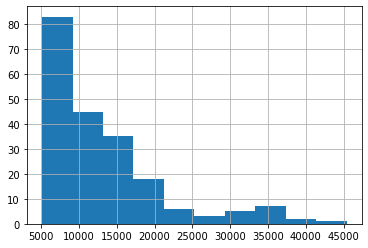

In [11]:
data['price'].hist()

In [13]:
data['horsepower']#.hist()

0      111
1      111
2      154
3      102
4      115
      ... 
200    114
201    160
202    134
203    106
204    114
Name: horsepower, Length: 205, dtype: int64

In [15]:
data['fueltype'].value_counts()#.hist()

gas       185
diesel     20
Name: fueltype, dtype: int64

# Меры и типы переменных

<img src='https://crincum.ru/wp-content/uploads/2017/11/%D0%9C%D0%B5%D1%80%D1%8B_%D0%B8_%D1%82%D0%B8%D0%BF%D1%8B_%D0%BF%D0%B5%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D1%85__%D1%87%D1%82%D0%BE_%D0%B8_%D0%B3%D0%B4%D0%B5_%D0%BF%D1%80%D0%B8%D0%BC%D0%B5%D0%BD%D0%B8%D0%BC%D0%BE_.png'>

* **MAD** – Медианное абсолютное отклонение
* **СКО** – Среднеквадратичное отклонение

# Выборка, ошибки выборки, объем выборки

* https://fdfgroup.ru/poleznaya-informatsiya/stati/vyborka-tipy-vyborok-raschet-oshibki-vyborki/#1_anchor

* https://fdfgroup.ru/poleznaya-informatsiya/stati/vyborka-tipy-vyborok-raschet-oshibki-vyborki/#2_anchor

# Генеральная совокупность

Суммарная численность объектов наблюдения (люди, домохозяйства, предприятия, населенные пункты и т.д.), обладающих определенным набором признаков (пол, возраст, доход, численность, оборот и т.д.), ограниченная в пространстве и времени. Примеры генеральных совокупностей

* Все жители Москвы (10,6 млн. человек по данным переписи 2002 года)
* Мужчины-Москвичи (4,9 млн. человек по данным переписи 2002 года) 
* Юридические лица России (2,2 млн. на начало 2005 года)
* Розничные торговые точки, осуществляющие продажу продуктов питания (20 тысяч на начало 2008 года) и т.д. 

# Выборка (Выборочная совокупность)

Часть объектов из генеральной совокупности, отобранных для изучения, с тем чтобы сделать заключение обо всей генеральной совокупности. Для того чтобы заключение, полученное путем изучения выборки, можно было распространить на всю генеральную совокупность, выборка должна обладать свойством репрезентативности. 

# Репрезентативность выборки
Свойство выборки корректно отражать генеральную совокупность. Одна и та же выборка может быть репрезентативной и нерепрезентативной для разных генеральных совокупностей.
Пример:

Выборка, целиком состоящая из москвичей, владеющих автомобилем, не репрезентирует все население Москвы. 
Выборка из российских предприятий численностью до 100 человек не репрезентирует все предприятия России.
Выборка из москвичей, совершающих покупки на рынке, не репрезентирует покупательское поведение всех москвичей.


В то же время, указанные выборки (при соблюдении прочих условий) могут отлично репрезентировать москвичей-автовладельцев, небольшие и средние российские предприятия и покупателей, совершающих покупки на рынках соответственно.
Важно понимать, что репрезентативность выборки и ошибка выборки – разные явления. Репрезентативность, в отличие от ошибки никак не зависит от размера выборки.
Пример:
Как бы мы не увеличивали количество опрошенных москвичей-автовладельцев, мы не сможем репрезентировать этой выборкой всех москвичей.

# Ошибка выборки (доверительный интервал)
Отклонение результатов, полученных с помощью выборочного наблюдения от истинных данных генеральной совокупности.
Ошибка выборки бывает двух видов – статистическая и систематическая. Статистическая ошибка зависит от размера выборки. Чем больше размер выборки, тем она ниже.

**Пример:**
Для простой случайной выборки размером 400 единиц максимальная статистическая ошибка (с 95% доверительной вероятностью) составляет 5%, для выборки в 600 единиц – 4%, для выборки в 1100 единиц – 3% Обычно, когда говорят об ошибке выборки, подразумевают именно статистическую ошибку.
Систематическая ошибка зависит от различных факторов, оказывающих постоянное воздействие на исследование и смещающих результаты исследования в определенную сторону.
Пример:

Использование любых вероятностных выборок занижает долю людей с высоким доходом, ведущих активный образ жизни. Происходит это в силу того, что таких людей гораздо сложней застать в каком-либо определенном месте (например, дома).
Проблема респондентов, отказывающихся отвечать на вопросы  анкеты (доля «отказников» в Москве, для разных опросов, колеблется от 50% до 80%)

В некоторых случаях, когда известны истинные распределения, систематическую ошибку можно нивелировать введением квот или перевзвешиванием данных, но в большинстве реальных исследований даже оценить ее бывает достаточно проблематично.  

# Типы выборок
Выборки делятся на два типа:

вероятностные
невероятностные 

## 1. Вероятностные выборки
### Случайная выборка (простой случайный отбор)
Такая выборка предполагает однородность генеральной совокупности, одинаковую вероятность доступности всех элементов, наличие полного списка всех элементов. При отборе элементов, как правило, используется таблица случайных чисел. 
### Механическая (систематическая) выборка
Разновидность случайной выборки, упорядоченная по какому-либо признаку (алфавитный порядок, номер телефона, дата рождения и т.д.). Первый элемент отбирается случайно, затем, с шагом ‘n’ отбирается каждый ‘k’-ый элемент. Размер генеральной совокупности, при этом – N=n*k 
### Стратифицированная (районированная)
Применяется в случае неоднородности генеральной совокупности. Генеральная совокупность разбивается на группы (страты). В каждой страте отбор осуществляется случайным или механическим образом. 
### Серийная (гнездовая или кластерная) выборка
При серийной выборке единицами отбора выступают не сами объекты, а группы (кластеры или гнёзда). Группы отбираются случайным образом. Объекты внутри групп обследуются сплошняком. 

## 2. Невероятностные выборки
Отбор в такой выборке осуществляется не по принципам случайности, а по субъективным критериям – доступности, типичности, равного представительства и т.д.. 
### Квотная выборка
Изначально выделяется некоторое количество групп объектов (например, мужчины в возрасте 20-30 лет, 31-45 лет и 46-60 лет; лица с доходом до 30 тысяч рублей, с доходом от 30 до 60 тысяч рублей и с доходом свыше 60 тысяч рублей) Для каждой группы задается количество объектов, которые должны быть обследованы. Количество объектов, которые должны попасть в каждую из групп, задается, чаще всего, либо пропорционально заранее известной доле группы в генеральной совокупности, либо одинаковым для каждой группы. Внутри групп объекты отбираются произвольно. Квотные выборки используются в маркетинговых исследованиях достаточно часто. 
### Метод снежного кома
Выборка строится следующим образом. У каждого респондента, начиная с первого, просятся контакты его друзей, коллег, знакомых, которые подходили бы под условия отбора и могли бы принять участие в исследовании. Таким образом, за исключением первого шага, выборка формируется с участием самих объектов исследования. Метод часто применяется, когда необходимо найти и опросить труднодоступные группы респондентов (например, респондентов, имеющих высокий доход, респондентов, принадлежащих к одной профессиональной группе, респондентов, имеющих какие-либо схожие хобби/увлечения и т.д.) 
### Стихийная выборка
Опрашиваются наиболее доступные респонденты. Типичные примеры стихийных выборок – опросы в газетах/журналах, анкеты, отданные респондентам на самозаполнение, большинство интернет-опросов. Размер и состав стихийных выборок заранее не известен, и определяется только одним параметром – активностью респондентов. 
### Выборка типичных случаев
Отбираются единицы генеральной совокупности, обладающие средним (типичным) значением признака. При этом возникает проблема выбора признака и определения его типичного значения. 

# Пропуски и выбросы

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)
pd.options.mode.chained_assignment = None

In [105]:
# чтение данных
df = pd.read_csv('./data/sberbank.csv')
# shape and data types of the data
# print(df.shape)
# print(df.dtypes)
df.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452


<div class="alert alert-info">

<b>Про датасет: </b>

Данные для прогнозирования продажной цены каждого объекта недвижимости. Целевая переменная называется `price_doc` в train.csv.

Данные обучения - с августа `2011` года по июнь `2015` года, а набор тестов - с июля `2015` года по май `2016` года. Набор данных также включает информацию об общих условиях в российской экономике и финансовом секторе, поэтому вы можете сосредоточиться на создании точных прогнозов цен для отдельных объектов недвижимости. , без необходимости предугадывать, что будет с бизнес-циклом.
    
https://www.kaggle.com/c/sberbank-russian-housing-market/data

In [19]:
# отбор числовых колонок
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols[:10])

# отбор нечисловых колонок
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols[:10])

['id' 'full_sq' 'life_sq' 'floor' 'max_floor' 'material' 'build_year'
 'num_room' 'kitch_sq' 'state']
['timestamp' 'product_type' 'sub_area' 'culture_objects_top_25'
 'thermal_power_plant_raion' 'incineration_raion' 'oil_chemistry_raion'
 'radiation_raion' 'railroad_terminal_raion' 'big_market_raion']


In [22]:
# df['max_floor']

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Columns: 292 entries, id to price_doc
dtypes: float64(119), int64(157), object(16)
memory usage: 67.9+ MB


In [26]:
# df[cols].isnull()

<AxesSubplot:>

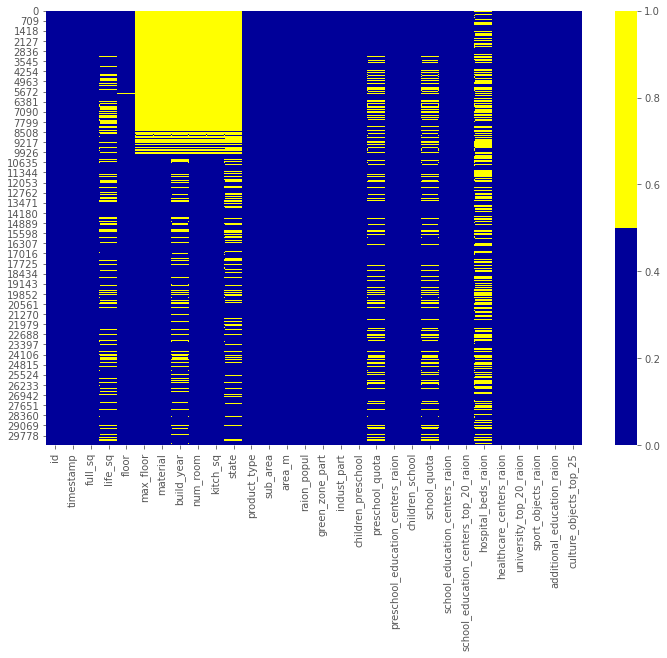

In [24]:
cols = df.columns[:30] # первые 30 колонок
# определяем цвета 
# желтый - пропущенные данные, синий - не пропущенные
colours = ['#000099', '#ffff00'] 

sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [32]:
# df.info()

In [27]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

id - 0%
timestamp - 0%
full_sq - 0%
life_sq - 21%
floor - 1%
max_floor - 31%
material - 31%
build_year - 45%
num_room - 31%
kitch_sq - 31%
state - 44%
product_type - 0%
sub_area - 0%
area_m - 0%
raion_popul - 0%
green_zone_part - 0%
indust_part - 0%
children_preschool - 0%
preschool_quota - 22%
preschool_education_centers_raion - 0%
children_school - 0%
school_quota - 22%
school_education_centers_raion - 0%
school_education_centers_top_20_raion - 0%
hospital_beds_raion - 47%
healthcare_centers_raion - 0%
university_top_20_raion - 0%
sport_objects_raion - 0%
additional_education_raion - 0%
culture_objects_top_25 - 0%
culture_objects_top_25_raion - 0%
shopping_centers_raion - 0%
office_raion - 0%
thermal_power_plant_raion - 0%
incineration_raion - 0%
oil_chemistry_raion - 0%
radiation_raion - 0%
railroad_terminal_raion - 0%
big_market_raion - 0%
nuclear_reactor_raion - 0%
detention_facility_raion - 0%
full_all - 0%
male_f - 0%
female_f - 0%
young_all - 0%
young_male - 0%
young_female - 0

# Что делать с пропущенными значениями?

Первая техника в статистике называется методом удаления по списку и заключается в простом отбрасывании записи, содержащей пропущенные значения. Это решение подходит только в том случае, если недостающие данные не являются информативными.

Для отбрасывания можно использовать и другие критерии. Например, из гистограммы, построенной в предыдущем разделе, мы узнали, что лишь небольшое количество строк содержат более 35 пропусков. Мы можем создать новый набор данных `df_less_missing_rows`, в котором отбросим эти строки.

## Отбрасывание записей

Как и предыдущая техника, отбрасывание признаков может применяться только для неинформативных признаков.

В процентном списке, построенном ранее, мы увидели, что признак `hospital_beds_raion` имеет высокий процент недостающих значений – 47%. Мы можем полностью отказаться от этого признака:

In [34]:
# отбрасываем строки с большим количеством пропусков
ind_missing = df[df['num_missing'] > 35].index
df_less_missing_rows = df.drop(ind_missing, axis=0)

KeyError: 'num_missing'

## Отбрасывание признаков

Как и предыдущая техника, отбрасывание признаков может применяться только для неинформативных признаков.

В процентном списке, построенном ранее, мы увидели, что признак hospital_beds_raion имеет высокий процент недостающих значений – 47%. Мы можем полностью отказаться от этого признака:

In [ ]:
cols_to_drop = ['hospital_beds_raion']
df_less_hos_beds_raion = df.drop(cols_to_drop, axis=1)

# Внесение недостающих значений

Для численных признаков можно воспользоваться методом принудительного заполнения пропусков. Например, на место пропуска можно записать среднее или медианное значение, полученное из остальных записей.

Для категориальных признаков можно использовать в качестве заполнителя наиболее часто встречающееся значение.

Возьмем для примера признак `life_sq` и заменим все недостающие значения медианой этого признака:

In [49]:
df['life_sq'].isnull().sum()

6383

In [50]:
med = df['life_sq'].median()
print(med)
df['life_sq'] = df['life_sq'].fillna(med)

30.0


In [53]:
# df['life_sq']#.isnull().sum()

Одну и ту же стратегию принудительного заполнения можно применить сразу для всех числовых признаков:

In [22]:
# impute the missing values and create the missing value indicator variables for each numeric column.
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
for col in numeric_cols:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  # only do the imputation for the columns that have missing values.
        print('imputing missing values for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing
        med = df[col].median()
        df[col] = df[col].fillna(med)

imputing missing values for: life_sq
imputing missing values for: floor
imputing missing values for: max_floor
imputing missing values for: material
imputing missing values for: build_year
imputing missing values for: num_room
imputing missing values for: kitch_sq
imputing missing values for: state
imputing missing values for: preschool_quota
imputing missing values for: school_quota
imputing missing values for: hospital_beds_raion
imputing missing values for: raion_build_count_with_material_info
imputing missing values for: build_count_block
imputing missing values for: build_count_wood
imputing missing values for: build_count_frame
imputing missing values for: build_count_brick
imputing missing values for: build_count_monolith
imputing missing values for: build_count_panel
imputing missing values for: build_count_foam
imputing missing values for: build_count_slag
imputing missing values for: build_count_mix
imputing missing values for: raion_build_count_with_builddate_info
imputing m

К счастью, в нашем наборе не нашлось пропусков в категориальных признаках. Но это не мешает нам продемонстрировать использование той же стратегии:

In [56]:
df['product_type']#.iloc[1] = np.nan

0           Investment
1                  NaN
2           Investment
3           Investment
4           Investment
             ...      
30466       Investment
30467       Investment
30468    OwnerOccupier
30469       Investment
30470       Investment
Name: product_type, Length: 30471, dtype: object

In [57]:
df['product_type'].value_counts()

Investment       19447
OwnerOccupier    11023
Name: product_type, dtype: int64

In [23]:
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
for col in non_numeric_cols:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  # only do the imputation for the columns that have missing values.
        print('imputing missing values for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing
        
        top = df[col].describe()['top'] # impute with the most frequent value.
        df[col] = df[col].fillna(top)

# Замена недостающих значений

Можно использовать некоторый дефолтный плейсхолдер для пропусков, например, новую категорию _MISSING_ для категориальных признаков или число -999 для числовых.

Таким образом, мы сохраняем данные о пропущенных значениях, что тоже может быть ценной информацией.

In [24]:
# категориальные признаки
df['sub_area'] = df['sub_area'].fillna('_MISSING_')
# численные признаки
df['life_sq'] = df['life_sq'].fillna(-999)

# Нетипичные данные (выбросы)

**Выбросы** – это данные, которые существенно отличаются от других наблюдений. Они могут соответствовать реальным отклонениям, но могут быть и просто ошибками.

<img src='https://miro.medium.com/max/697/1*O3lOgPwuHP7Vfc1T6NDRrQ.png'>

# Как обнаружить выбросы?

* Гистограмма
* Коробчатая диаграмма (бокс-плот)

Если признак численный, можно построить гистограмму или коробчатую диаграмму (ящик с усами). Посмотрим на примере уже знакомого нам признака life_sq.

<AxesSubplot:>

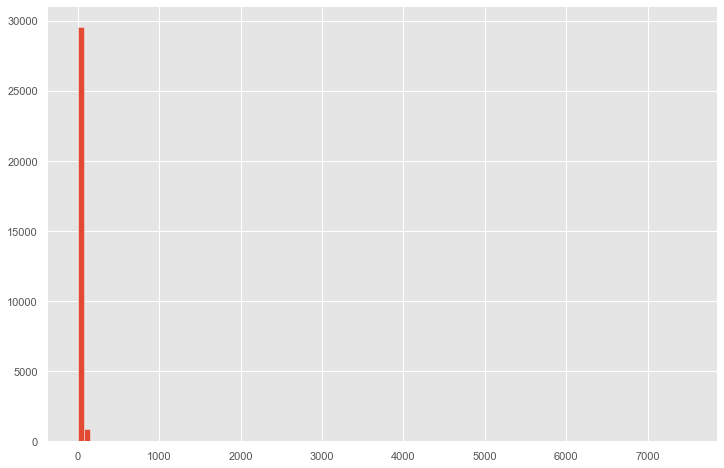

In [26]:
df['life_sq'].hist(bins=100)

<AxesSubplot:>

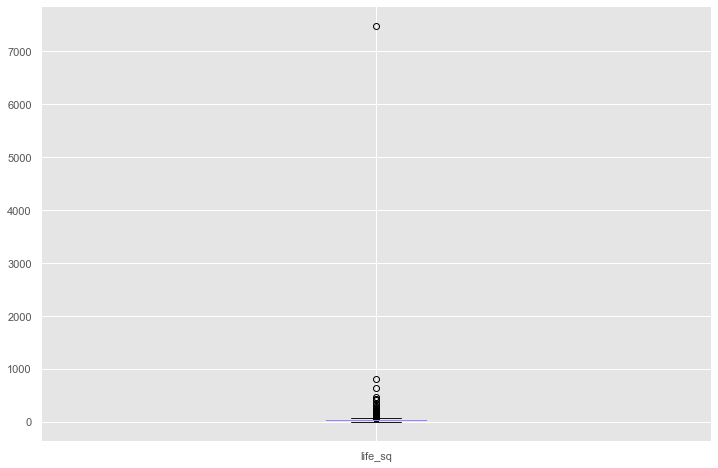

In [27]:
df.boxplot(column=['life_sq'])

# Что делать?

Выбросы довольно просто обнаружить, но выбор способа их устранения слишком существенно зависит от специфики набора данных и целей проекта. Их обработка во многом похожа на обработку пропущенных данных, которую мы разбирали в предыдущем разделе. Можно удалить записи или признаки с выбросами, либо скорректировать их, либо оставить без изменений.

<AxesSubplot:>

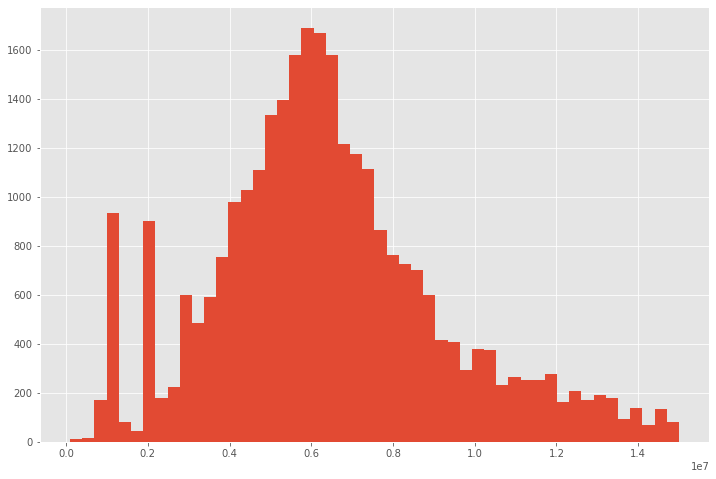

In [70]:
df[df['price_doc'] < 15*10**6]['price_doc'].hist(bins=50)

<AxesSubplot:>

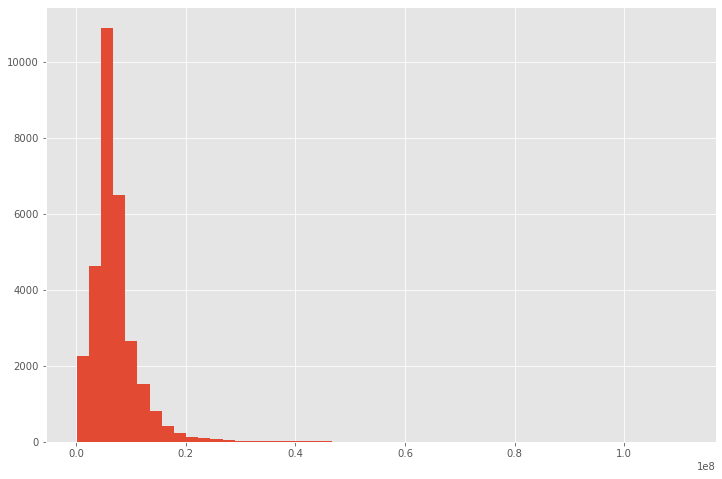

In [67]:
df['price_doc'].hist(bins=50)

<AxesSubplot:>

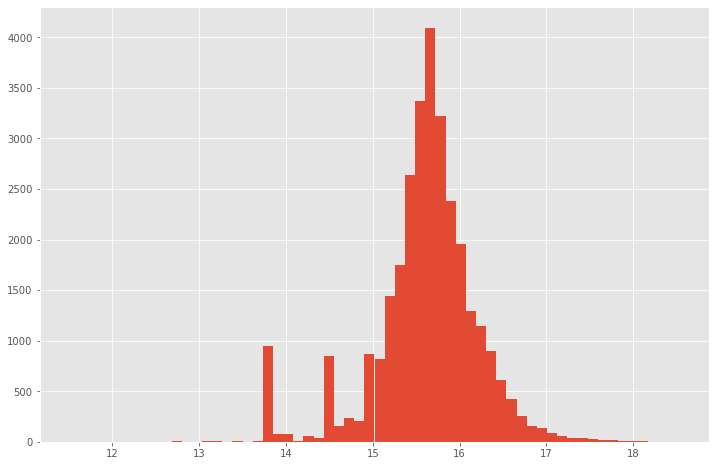

In [69]:
np.log(df['price_doc']).hist(bins=60)

# Преобразование Бокса - Кокса. 

<img src='./images/box_cox.PNG'>

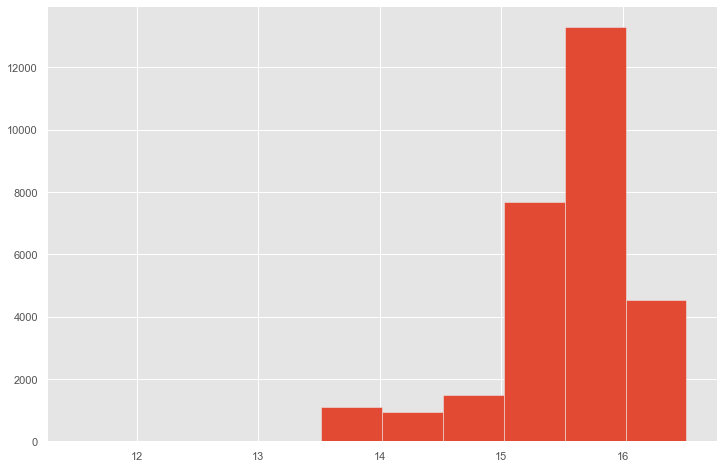

In [43]:
prices = df[df['price_doc'] < 15*10**6]['price_doc']

prices_l = np.log(prices)

plt.hist(prices_l);

<img src='https://lh3.googleusercontent.com/proxy/ELFmv7PM0KBWF0GGeGxkU5A438DxI9efuh2yCoTimMrs2F5b5oDUH3hHMvYc9057scSCbYKhUw6ErSus_r6TlSFqfuubYos'>



<AxesSubplot:>

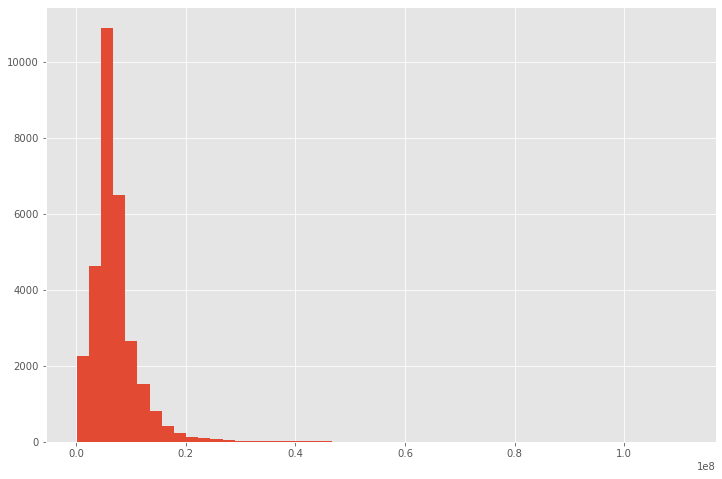

In [79]:
df['price_doc'].hist(bins=50)

In [80]:
from scipy.stats import boxcox
from scipy.special import inv_boxcox

y = df['price_doc'].values
y, fitted_lambda= boxcox(y, lmbda=None)
print('fitted_lambda', fitted_lambda)

new_y = inv_boxcox(y, fitted_lambda)
new_y

fitted_lambda 0.21963574771308522


array([ 5850000.        ,  6000000.        ,  5700000.        , ...,
        6970958.99999999, 13500000.00000002,  5600000.        ])

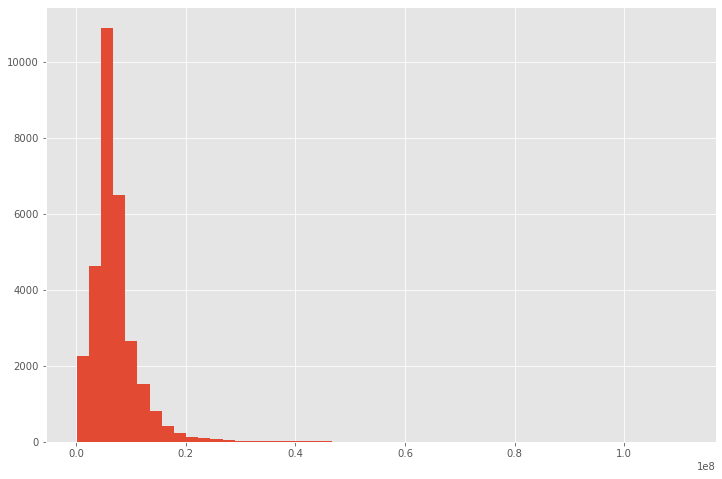

In [81]:
plt.hist(new_y, bins=50);

# Масштабирование и категориальные переменные

 Переменные имею разных диапазон значений. 

In [82]:
df

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,30469,2015-06-30,44,27.0,7.0,9.0,1.0,1975.0,2.0,6.0,...,15,5,0,15,26,1,2,84,6,7400000
30467,30470,2015-06-30,86,59.0,3.0,9.0,2.0,1935.0,4.0,10.0,...,313,128,24,98,182,1,82,171,15,25000000
30468,30471,2015-06-30,45,30.0,10.0,20.0,1.0,NaN,1.0,1.0,...,1,1,0,2,12,0,1,11,1,6970959
30469,30472,2015-06-30,64,32.0,5.0,15.0,1.0,2003.0,2.0,11.0,...,22,1,1,6,31,1,4,65,7,13500000


## Зачем?

- Нарушаются условия для статистических методов (PCA)
- Ломаются ML алгоритмы (KNN, NN)


## Как?

* Нормализация
* Масштабирование на отрезок `[0:1]`
* Робастная нормализация (устойчивая к выбросам)

<AxesSubplot:>

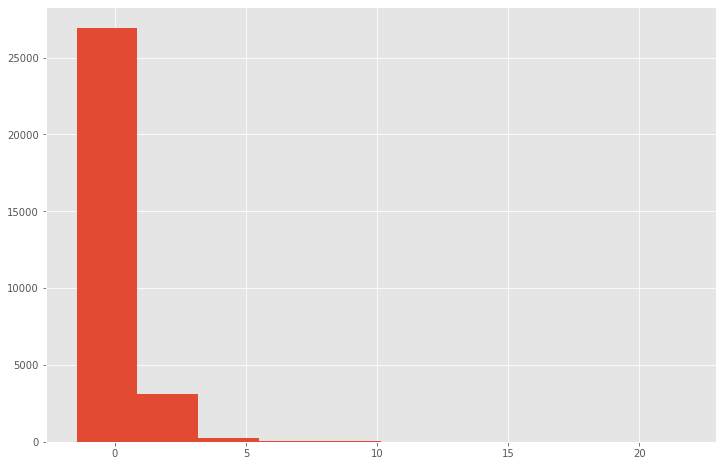

In [88]:
new_price = (df['price_doc'] - df['price_doc'].mean())/df['price_doc'].std()
# new_price.hist()

<img src='https://miro.medium.com/max/1326/0*w3wZvnUfVMmXwlzr.png'>

In [8]:
data = pd.read_csv('./data/CarPrice_Assignment.csv')
print("Dimension of our data set is: ")
print(data.shape)
data.head()

Dimension of our data set is: 
(205, 26)


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler

In [90]:
col = 'price_doc'
values = df[col].values
values = values.reshape((len(values), 1))
# train the standardization
scaler = StandardScaler()
scaler = scaler.fit(values)
print('Mean: %f, StandardDeviation: %f' % (scaler.mean_, sqrt(scaler.var_)))

Mean: 7123035.277739, StandardDeviation: 4780032.891930


In [92]:
# нормализация данных и распечатать первые 5 строк
normalized = scaler.transform(values)
for i in range(5):
    print(normalized[i])
    
# обратное преобразование и печать первых 5 строк
inversed = scaler.inverse_transform(normalized)
for i in range(5):
    print(inversed[i])

[-0.26632354]
[-0.234943]
[-0.29770408]
[1.25040243]
[1.92643376]
[5850000.]
[6000000.]
[5700000.]
[13100000.]
[16331452.]


# MinMaxScaler

In [2]:
from sklearn.preprocessing import MinMaxScaler

In [94]:
col = 'price_doc'
values = df[col].values
values = values.reshape((len(values), 1))


scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(values)

print('Min: %f, Max: %f' % (scaler.data_min_, scaler.data_max_))

Min: 100000.000000, Max: 111111112.000000


In [95]:
# нормализация данных и распечатать первые 5 строк
normalized = scaler.transform(values)
for i in range(5):
    print(normalized[i])

# обратное преобразование и печать первых 5 строк
inversed = scaler.inverse_transform(normalized)
for i in range(5):
    print(inversed[i])

[0.05179662]
[0.05314783]
[0.0504454]
[0.11710539]
[0.14621466]
[5850000.]
[6000000.]
[5700000.]
[13100000.]
[16331452.]


# RobustScaler

In [6]:
from sklearn.preprocessing import RobustScaler

In [96]:
col = 'price_doc'
values = df[col].values
values = values.reshape((len(values), 1))
# train the standardization
scaler = StandardScaler()
scaler = scaler.fit(values)
print('Mean: %f, StandardDeviation: %f' % (scaler.mean_, sqrt(scaler.var_)))

Mean: 7123035.277739, StandardDeviation: 4780032.891930


In [97]:
# нормализация данных и распечатать первые 5 строк
normalized = scaler.transform(values)

for i in range(5):
    print(normalized[i])


# обратное преобразование и печать первых 5 строк
inversed = scaler.inverse_transform(normalized)

for i in range(5):
    print(inversed[i])

[-0.26632354]
[-0.234943]
[-0.29770408]
[1.25040243]
[1.92643376]
[5850000.]
[6000000.]
[5700000.]
[13100000.]
[16331452.]


<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQUjmCHNfWOP0w3QRSEpulFdOeCPTdLPrw-qvN0x14fylAgiKwSiH9WT5td9OjjwanXTu4&usqp=CAU' width=600>


# А что делать с категориальными переменными?

In [ ]:
# from sklearn.preprocessing import OneHotEncoder

In [100]:
col = 'product_type'
df[col].fillna('Investment', inplace=True)
df[col]

0           Investment
1           Investment
2           Investment
3           Investment
4           Investment
             ...      
30466       Investment
30467       Investment
30468    OwnerOccupier
30469       Investment
30470       Investment
Name: product_type, Length: 30471, dtype: object

In [109]:
import pandas as pd
        
col = 'product_type'
one_hot = pd.get_dummies(df[col])
one_hot.head()

,Investment,OwnerOccupier
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [110]:
# Удаляем теперь перекодированные столбец
df = df.drop(col, axis = 1)
# Собираем в идиный столбец
df = df.join(one_hot)

In [112]:
df

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc,Investment,OwnerOccupier
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,0,13,22,1,0,52,4,5850000,1,0
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,0,15,29,1,10,66,14,6000000,1,0
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,0,11,27,0,4,67,10,5700000,1,0
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,1,4,4,0,0,26,3,13100000,1,0
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,17,135,236,2,91,195,14,16331452,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,30469,2015-06-30,44,27.0,7.0,9.0,1.0,1975.0,2.0,6.0,...,0,15,26,1,2,84,6,7400000,1,0
30467,30470,2015-06-30,86,59.0,3.0,9.0,2.0,1935.0,4.0,10.0,...,24,98,182,1,82,171,15,25000000,1,0
30468,30471,2015-06-30,45,NaN,10.0,20.0,1.0,NaN,1.0,1.0,...,0,2,12,0,1,11,1,6970959,0,1
30469,30472,2015-06-30,64,32.0,5.0,15.0,1.0,2003.0,2.0,11.0,...,1,6,31,1,4,65,7,13500000,1,0


# Проблемы

- Dummies ловушка
- Проклятие размерности